In [1]:
import torch
import numpy as np
from matplotlib import pyplot as plt
import cv2
import pandas as pd 

from filter import position_filter

In [2]:
# !cd yolov5 && python train.py --img 320 --batch 16 --epochs 100 --data dataset.yml --weights yolov5s.pt 

In [3]:

model = torch.hub.load('ultralytics/yolov5', 'custom',
                       path='yolov5/runs/train/exp6/weights/last.pt', force_reload=True)



Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /Users/chkim/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-8-13 Python-3.8.13 torch-1.11.0 CPU

Fusing layers... 
Model summary: 213 layers, 7050580 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


<h3> Detection using Img </h3>

In [4]:
path = './Resources/images/person.c01a3fd8-1630-11ed-8541-625dc17c81e1.jpg'

image 1/1: 720x1280 1 person
Speed: 11.9ms pre-process, 46.0ms inference, 0.5ms NMS per image at shape (1, 3, 384, 640)


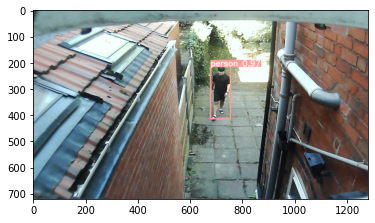

In [5]:
result = model(path)
result.print()

%matplotlib inline
plt.imshow(np.squeeze(result.render()))
plt.show()

In [6]:
path1 = './Resources/example.png'

result = model(path1)
result.print()



image 1/1: 1036x1686 (no detections)
Speed: 94.6ms pre-process, 47.4ms inference, 0.2ms NMS per image at shape (1, 3, 416, 640)


In [7]:
result.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name


In [8]:
result.xywh

[tensor([], size=(0, 6))]

In [9]:
arr = result.xywh[0].numpy()

In [16]:
#cv2.imshow('img',np.squeeze(result.render()))

<h3> Detection using Video </h3>

In [12]:
path = './Resources/ex.mp4'

In [13]:
vid_capture = cv2.VideoCapture(path)

title = path.split('/')
vid_title = title[len(title)-1]


In [19]:
# People counting 
count = 0 # Initial value  
prev_position = []
curr_position = []
count = 0

line = 390

# Capture the number of objects above the line at the first time
first_scene = True

while(vid_capture.isOpened()):
    
    ret, frame = vid_capture.read()

    if(ret):
        result = model(frame)
        img = np.squeeze(result.render())
        
        # Indicate object using circle and count 
        if len(result.xywh[0].numpy()) != 0:
            arr = result.xywh[0].numpy()
            prev_position = curr_position
            curr_position = []
            for i in range(len(arr)):
                position = (int(arr[i][0]),int(arr[i][1]))  
                cv2.circle(img,position, 3, (0,0,255), -1)
                y_position = position[1]
                if y_position < line and first_scene:
                    count +=1
                else :
                    curr_position.append(position)
            first_scene = False
            count += basic_position_filter(prev_position,curr_position,line)
            
        img = cv2.line(img, pt1=(0, line), pt2=(1280, line), color=(0, 255, 0), thickness=2, lineType=8, shift=0)
        font = cv2.FONT_HERSHEY_SIMPLEX
        text = "num person : {d}".format(d=count)
        cv2.putText(img,
                text,
                (50, 50),
                font, 1,
                (255, 0, 0),
                2,
                cv2.LINE_4)
        cv2.imshow(vid_title, img)
        
        # The funtion wait pauses for (ms) between frames
        key = cv2.waitKey(10)
        if key == ord('q'):
            break
    else:
        break


[] []
[] [(513, 259), (647, 323)]
[(513, 259), (647, 323)] [(512, 259), (642, 322)]
[(512, 259), (642, 322)] [(512, 259), (633, 318)]
[(512, 259), (633, 318)] [(512, 260), (627, 322)]
[(512, 260), (627, 322)] [(512, 260), (619, 323)]
[(512, 260), (619, 323)] [(511, 260), (615, 323), (601, 275)]
[(511, 260), (615, 323), (601, 275)] [(511, 259), (603, 309)]
[(511, 259), (603, 309)] [(511, 259), (590, 268), (602, 310)]
[(511, 259), (590, 268), (602, 310)] [(511, 258), (589, 267)]
[(511, 258), (589, 267)] [(511, 259)]
[(511, 259)] [(511, 259), (602, 313)]
[(511, 259), (602, 313)] [(511, 259), (604, 313), (593, 274)]
[(511, 259), (604, 313), (593, 274)] [(511, 260), (612, 325), (599, 279)]
[(511, 260), (612, 325), (599, 279)] [(512, 260), (614, 327)]
[(512, 260), (614, 327)] [(512, 260), (621, 311)]
[(512, 260), (621, 311)] [(512, 260), (631, 331)]
[(512, 260), (631, 331)] [(512, 260), (637, 329)]
[(512, 260), (637, 329)] [(512, 260), (641, 333), (649, 280)]
[(512, 260), (641, 333), (649, 2

<h3> Real Time Detection </h3>

In [46]:

cam_capture = cv2.VideoCapture(1)

frame_width = cam_capture.get(3)
frame_height = cam_capture.get(4)
frame_size = (frame_width, frame_height)


while(cam_capture.isOpened()):
    ret, frame = cam_capture.read()

    if(ret):
        result = model(frame)
        cv2.imshow("webcam", np.squeeze(result.render()))
        key = cv2.waitKey(10)
        if key == ord('q'):
            break
    else:
        break

cam_capture.release()
cv2.destroyAllWindows()


OpenCV: out device of bound (0-0): 1
OpenCV: camera failed to properly initialize!
